<a href="https://colab.research.google.com/github/wojtwkg/lecture1/blob/main/PUM2_todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

import danych

In [2]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-2-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


100%|██████████| 6.09M/6.09M [00:00<00:00, 198MB/s]

Extracting zip of train.csv...


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [19]:
#1
df.info()
#2
df = df.drop_duplicates()
#3

#4
missing_data = df.isnull().sum()
print(missing_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  int64  
 3   Annual Income             100000 non-null  object 
 4   Monthly Inhand Salary     84998 non-null   float64
 5   Num Bank Accounts         100000 non-null  int64  
 6   Num Credit Card           100000 non-null  int64  
 7   Interest Rate             100000 non-null  int64  
 8   Num of Loan               100000 non-null  object 
 9   Type of Loan              100000 non-null  int64  
 10  Delay from due date       100000 non-null  int64  
 11  Num of Delayed Payment    92998 non-null   object 
 12  Changed Credit Limit      100000 non-null  object 
 13  Num Credit Inquiries      98035 non-null   fl

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [21]:
df = df.drop(['ID','Customer_ID','SSN','Name'], axis=1)


KeyError: "['ID', 'Customer_ID', 'SSN', 'Name'] not found in axis"

In [ ]:
df = df.drop(['ID','Customer_ID','SSN','Name'], axis=1)


usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [14]:
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace('-', ' ')
df = df.replace(r'^\s*$', np.nan, regex=True)


Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [22]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

if 'Month' in df.columns:
    df['Month'] = df['Month'].map(month_mapping)







In [23]:
df['Month']

,Month
0,1
1,2
2,3
3,4
4,5
...,...
99995,4
99996,5
99997,6
99998,7


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [24]:
label_encoder = LabelEncoder()

for column in ['Occupation', 'Type of Loan', 'Payment Behaviour', 'Credit Mix']:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


In [25]:
label_encoder = LabelEncoder()

for column in ['Occupation', 'Type of Loan', 'Payment Behaviour', 'Credit Mix']:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [26]:
import re

def convert_credit_history_age(age_str):
    if pd.isna(age_str):
        return np.nan

    match = re.match(r"(\d+)\s*(years|yrs)?\s*(\d+)\s*(months|mon)?", age_str)
    if match:
        years = int(match.group(1)) if match.group(1) else 0
        months = int(match.group(3)) if match.group(3) else 0
        return years * 12 + months
    else:
        return np.nan

if 'Credit History Age' in df.columns:
    df['Credit History Age Months'] = df['Credit History Age'].apply(convert_credit_history_age)
    df = df.drop('Credit History Age', axis=1)


Zmien inne zmienne na numeryczne

In [27]:

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass


Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [29]:
for col in ['Monthly Inhand Salary', 'Annual Income', 'Num of Bank Accounts', 'Num of Credit Card', 'Interest Rate', 'Num of Loan', 'Delay from due date', 'Num of Delayed Payment', 'Changed Credit Limit', 'Outstanding Debt', 'Credit Utilization Ratio', 'Credit History Age Months']:
    if col in df.columns:
      df[col] = df[col].fillna(df[col].mean())



Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

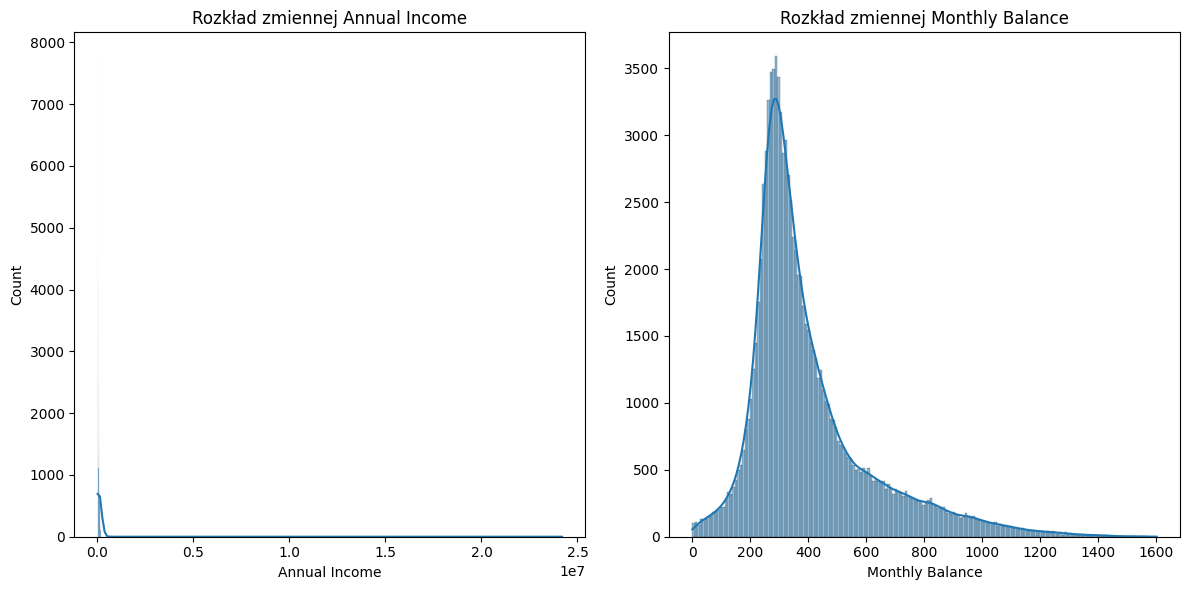

In [30]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income'], kde=True)
plt.title('Rozkład zmiennej Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Monthly Balance'], kde=True)
plt.title('Rozkład zmiennej Monthly Balance')

plt.tight_layout()
plt.show()


usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

In [31]:
if 'Age' in df.columns:
    df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]


Zwizualizuj korelacje między zmiennymi

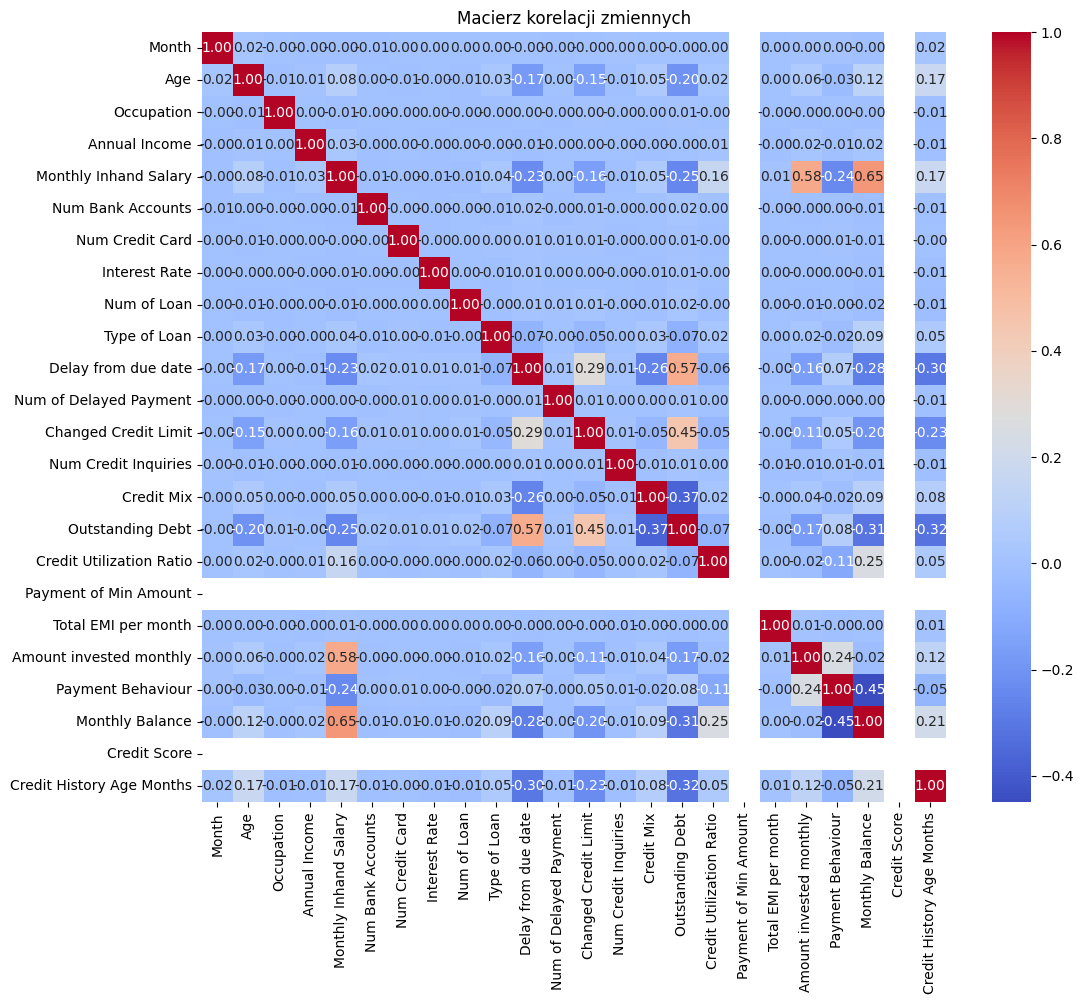

In [32]:

correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji zmiennych')
plt.show()
